In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')

import jlinops

In [2]:
#CMAP = "YlOrBr"
#CMAP = "Reds_r"
#CMAP = "YlGnBu_r"
#CMAP = "magma_r"
#CMAP = "inferno_r"
#CMAP = "twilight_shifted"
#CMAP = "RdBu"
#CMAP = "Spectral"
#CMAP = "gist_heat_r"
#CMAP = "hot"
#CMAP = "winter"
#CMAP = "YlGn_r"
#CMAP = "afmhot"
#CMAP = "Blues"
#CMAP = "Oranges"
#CMAP = "summer"
#CMAP = "viridis"
#CMAP = "seismic_r"
#CMAP = "cividis_r"
CMAP = "YlGnBu_r"

In [3]:
# m, n = 250, 250
m, n = 7, 5
np.random.seed(0)
w = np.random.uniform(low=1, high=5, size=2*m*n)
Apinv = jlinops.CGWeightedNeumann2DPinvOperator((m,n), 1.0/np.sqrt(w) , tol=1e-8)
R = jlinops.Neumann2D((m,n))
WR = jlinops.DiagonalOperator(1.0/np.sqrt(w)) @ R
WRmat=  jlinops.black_box_to_dense(WR)
RtWWRmat = WRmat.T @ WRmat
RWWRtmat = WRmat @ WRmat.T

In [4]:
Rmat = jlinops.black_box_to_dense(R)
RtR = Rmat.T @ Rmat
RRt = Rmat @ Rmat.T

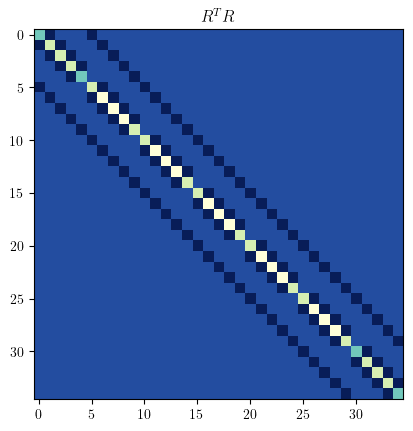

In [5]:
plt.imshow(RtR, cmap=CMAP)
plt.title("$R^T R$")
plt.show()

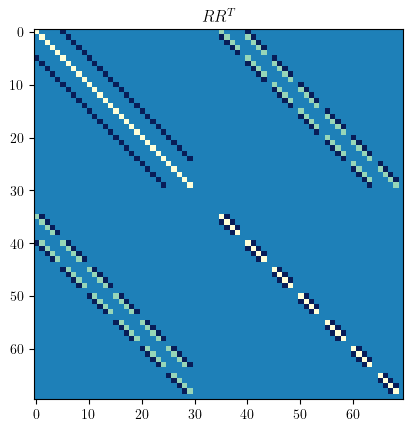

In [6]:
plt.imshow(RRt, cmap=CMAP)
plt.title("$RR^T$")
plt.show()

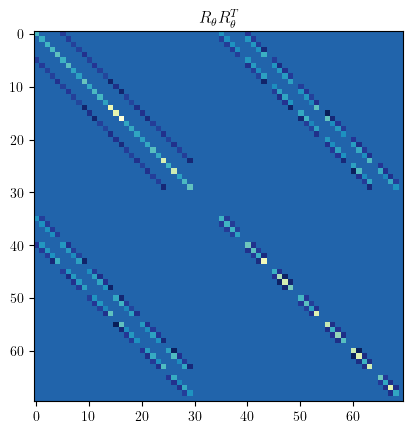

In [7]:
plt.imshow(RWWRtmat, cmap=CMAP)
plt.title("$R_{\\theta} R_{\\theta}^T$")
plt.show()

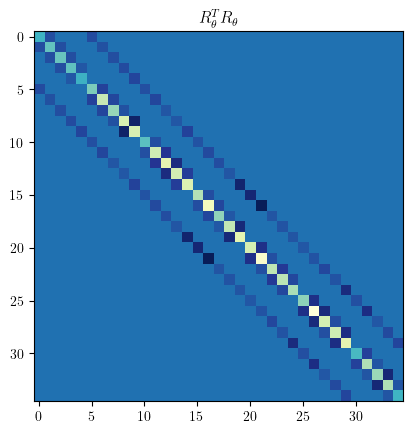

In [8]:
plt.imshow(RtWWRmat, cmap=CMAP)
plt.title("$R_{\\theta}^T  R_{\\theta}$")
plt.show()

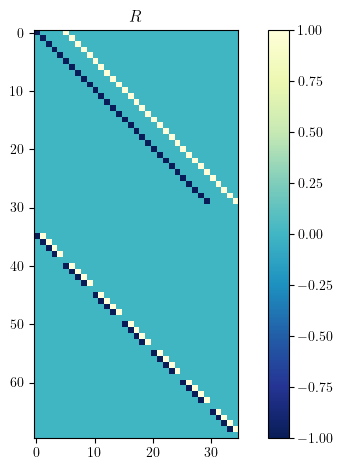

In [11]:
plt.imshow(Rmat, cmap=CMAP)
plt.title("$R$")
plt.colorbar()
plt.tight_layout()
plt.savefig("just_R.png", dpi=250, bbox_inches="tight")
plt.savefig("just_R.eps", bbox_inches="tight")
plt.show()

# Put altogether

In [9]:
# mpl.rcParams.update({'font.size': 1})

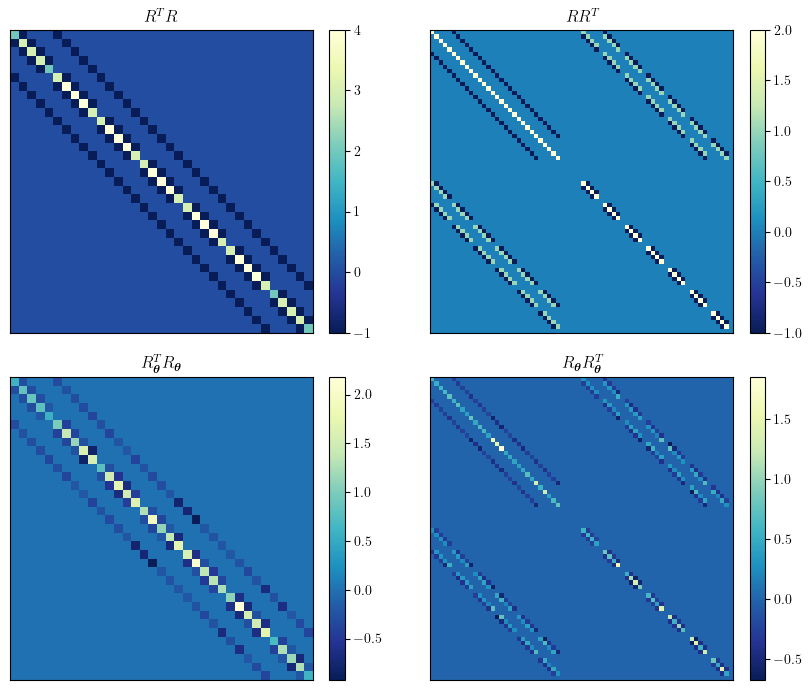

In [14]:
# Sample matrices
matrix1 = RtR
matrix2 = RRt
matrix3 = RtWWRmat
matrix4 = RWWRtmat

fig, axs = plt.subplots(2, 2, figsize=(9, 7))

# Plot each matrix and add a colorbar matching the height of each plot
im1 = axs[0, 0].imshow(matrix1, cmap=CMAP)
fig.colorbar(im1, ax=axs[0, 0], fraction=0.046, pad=0.04)
axs[0,0].set_title("$R^T R$")

im2 = axs[0, 1].imshow(matrix2, cmap=CMAP)
fig.colorbar(im2, ax=axs[0, 1], fraction=0.046, pad=0.04)
axs[0,1].set_title("$R R^T$")

im3 = axs[1, 0].imshow(matrix3, cmap=CMAP)
fig.colorbar(im3, ax=axs[1, 0], fraction=0.046, pad=0.04)
axs[1,0].set_title("$R_{ \\boldsymbol{\\theta}  }^T  R_{ \\boldsymbol{\\theta}  }$")

im4 = axs[1, 1].imshow(matrix4, cmap=CMAP)
fig.colorbar(im4, ax=axs[1, 1], fraction=0.046, pad=0.04)
axs[1,1].set_title("$R_{ \\boldsymbol{\\theta} } R_{ \\boldsymbol{\\theta} }^T$")


for ax in axs.reshape(-1): 
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()


fig.savefig("laplacians.png", dpi=250, bbox_inches="tight")
fig.savefig("laplacians.eps", bbox_inches="tight")

plt.show()

# Repeat with arcsine?

In [15]:
from scipy.stats import arcsine

In [21]:
# m, n = 250, 250
m, n = 7, 5
np.random.seed(0)
#w = np.random.uniform(low=1, high=5, size=2*m*n)
w = 5*arcsine.rvs(size=2*m*n)
Apinv = jlinops.CGWeightedNeumann2DPinvOperator((m,n), 1.0/np.sqrt(w) , tol=1e-8)
R = jlinops.Neumann2D((m,n))
WR = jlinops.DiagonalOperator(1.0/np.sqrt(w)) @ R
WRmat=  jlinops.black_box_to_dense(WR)
RtWWRmat = WRmat.T @ WRmat
RWWRtmat = WRmat @ WRmat.T

In [22]:
Rmat = jlinops.black_box_to_dense(R)
RtR = Rmat.T @ Rmat
RRt = Rmat @ Rmat.T

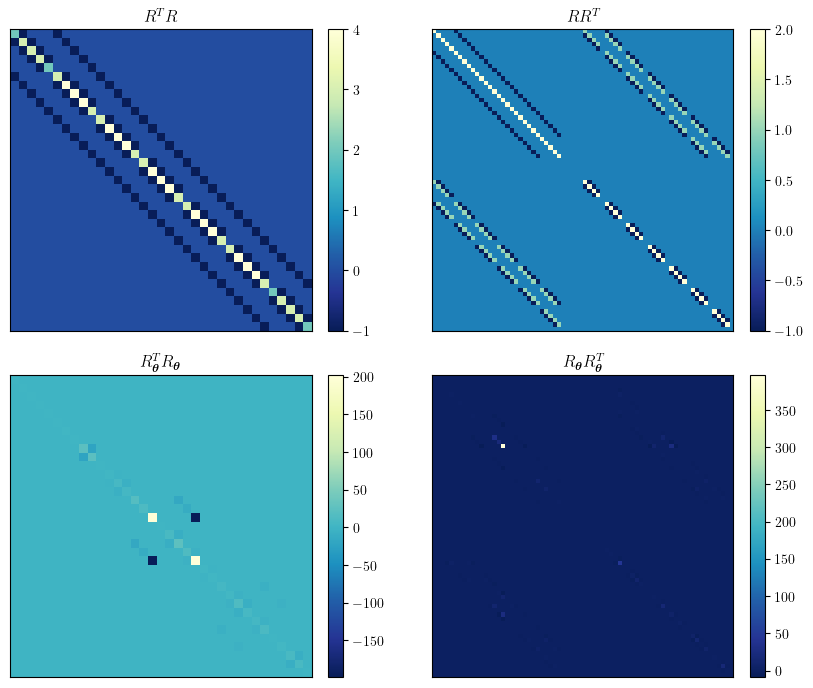

In [23]:
# Sample matrices
matrix1 = RtR
matrix2 = RRt
matrix3 = RtWWRmat
matrix4 = RWWRtmat

fig, axs = plt.subplots(2, 2, figsize=(9, 7))

# Plot each matrix and add a colorbar matching the height of each plot
im1 = axs[0, 0].imshow(matrix1, cmap=CMAP)
fig.colorbar(im1, ax=axs[0, 0], fraction=0.046, pad=0.04)
axs[0,0].set_title("$R^T R$")

im2 = axs[0, 1].imshow(matrix2, cmap=CMAP)
fig.colorbar(im2, ax=axs[0, 1], fraction=0.046, pad=0.04)
axs[0,1].set_title("$R R^T$")

im3 = axs[1, 0].imshow(matrix3, cmap=CMAP)
fig.colorbar(im3, ax=axs[1, 0], fraction=0.046, pad=0.04)
axs[1,0].set_title("$R_{ \\boldsymbol{\\theta}  }^T  R_{ \\boldsymbol{\\theta}  }$")

im4 = axs[1, 1].imshow(matrix4, cmap=CMAP)
fig.colorbar(im4, ax=axs[1, 1], fraction=0.046, pad=0.04)
axs[1,1].set_title("$R_{ \\boldsymbol{\\theta} } R_{ \\boldsymbol{\\theta} }^T$")


for ax in axs.reshape(-1): 
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()


#fig.savefig("laplacians.png", dpi=250, bbox_inches="tight")
#fig.savefig("laplacians.eps", bbox_inches="tight")

plt.show()

In [24]:
w

array([2.88187948e+00, 4.06426708e+00, 3.29315437e+00, 2.85134473e+00,
       1.90611857e+00, 3.60614984e+00, 2.01294601e+00, 4.85688237e+00,
       4.98372796e+00, 1.60487343e+00, 4.48366240e+00, 2.72662862e+00,
       3.03035980e+00, 4.93201445e+00, 6.19960871e-02, 9.30732491e-02,
       5.04147012e-03, 4.66225621e+00, 4.41702297e+00, 4.79442446e+00,
       4.99436195e+00, 4.51865097e+00, 2.19819752e+00, 4.42892967e+00,
       1.70603910e-01, 3.56388693e+00, 2.49271285e-01, 4.96232491e+00,
       2.67146161e+00, 1.83775673e+00, 8.14888886e-01, 4.39710065e+00,
       2.15669376e+00, 3.03334803e+00, 4.35439658e-03, 3.40301949e+00,
       3.36231301e+00, 3.39787971e+00, 4.96106377e+00, 3.85161603e+00,
       1.43205594e+00, 2.00866933e+00, 3.95437119e+00, 4.46143134e-02,
       3.75068044e+00, 3.77691314e+00, 5.26455453e-01, 2.02277411e-01,
       1.13025607e+00, 1.46199408e+00, 3.04686621e+00, 2.02076213e+00,
       4.99833262e+00, 1.27370518e-01, 5.19217752e-01, 3.14206628e-01,
      

(array([16.,  5.,  4.,  3.,  6.,  4.,  7.,  8.,  5., 12.]),
 array([4.35439658e-03, 5.03752219e-01, 1.00315004e+00, 1.50254786e+00,
        2.00194569e+00, 2.50134351e+00, 3.00074133e+00, 3.50013915e+00,
        3.99953698e+00, 4.49893480e+00, 4.99833262e+00]),
 <BarContainer object of 10 artists>)

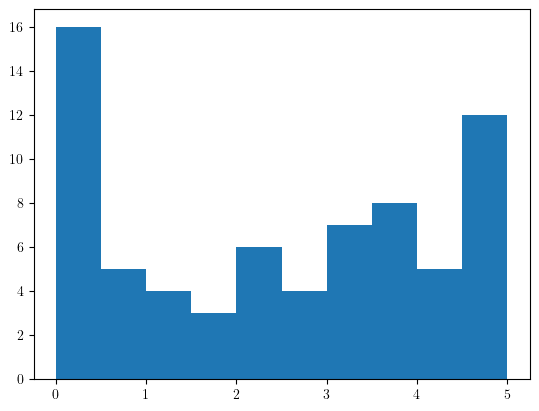

In [25]:
plt.hist(w)